

# RNN for Time Series

RNNs are used for sequence modeling. This tutorial will look at a tome series data to be modeled and predicted using RNNs. 

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Data

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted

Frequency:  Monthly

The value for the most recent month is an advance estimate that is based on data from a subsample of firms from the larger Monthly Retail Trade Survey. The advance estimate will be superseded in following months by revised estimates derived from the larger Monthly Retail Trade Survey. The associated series from the Monthly Retail Trade Survey is available at https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at https://www.census.gov/retail/marts/about_the_surveys.html

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

In [2]:
df = pd.read_csv('MRTSSM448USN.csv',index_col='DATE',parse_dates=True)

In [3]:
df.head()

,MRTSSM448USN
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


In [4]:
# Set name of column as 'Sales'. Use - df.columns 

df.columns = ['Sales']

df.head()

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


<Axes: xlabel='DATE'>

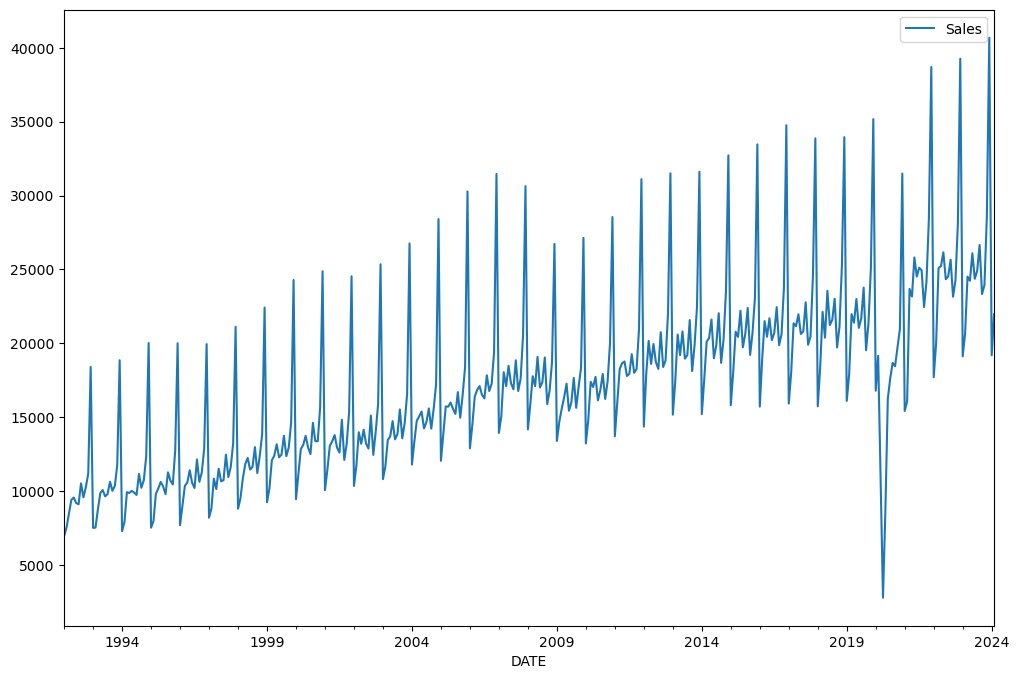

In [5]:
#Plot the data - Year vs Sales

df.plot(figsize=(12,8))

## Next we will do Train Test Split

We will use last 1.5 year (18 month) samples for testing. Rest is for training.

In [6]:
# Assign variable test size = 18

test_size = 18

In [7]:
# Store length of data in variable length.

data_length = len(df)
data_length

386

In [8]:
len(df)- 18

368

In [9]:
# store training size in varialable train_size 
# (Remember training size = total size - test_size)

train_size = data_length- test_size
train_size

368

In [10]:
# find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

test_index =  train_size

In [11]:
# separate train and test datasets.

train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [12]:
# Print the size of the train data
# Print the size of the test data

print(train.size)
print(test.size)

368
18


In [13]:
# Print the train data

train

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2022-04-01,25224.0
2022-05-01,26156.0
2022-06-01,24338.0


In [14]:
# Print the test data

test

,Sales
DATE,
2022-09-01,23152.0
2022-10-01,24243.0
2022-11-01,28045.0
2022-12-01,39263.0
2023-01-01,19118.0
2023-02-01,20666.0
2023-03-01,24510.0
2023-04-01,24232.0
2023-05-01,26096.0


## Scale Data
between 0-1

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [17]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [18]:
# Check if the data has been scaled properly

print(scaled_train.max())
print(scaled_test.max())
print(scaled_train.min())
print(scaled_test.min())

1.0
1.0553158319645888
0.0
0.4549427911249687


# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
#TimeseriesGenerator?

## We will use 12 months as input and then predict the next month out

In [21]:
# Let's redefine to get 12 months back and then predict the next month out
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, 
                                length=length, batch_size=1)

In [22]:
# What does the first batch look like?

X, y = generator[0]

In [23]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11586537 0.13217895 0.15865371 0.1844325  0.18880321 0.17833579
 0.17613652 0.21538933 0.18922079 0.20817906 0.23415272 0.43481529]
Predict this y: 
 [[0.13156649]]


### Create the Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [25]:
# We're only using one feature in our time series
n_features = 1

In [77]:
# define model

#model = Sequential()
#model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
#model.add(Dense(1))
model = Sequential([
    Dense(64, activation='relu', input_shape=(length, n_features)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with 1 unit for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])



In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12, 64)            128       
                                                                 
 dense_3 (Dense)             (None, 12, 32)            2080      
                                                                 
 dense_4 (Dense)             (None, 12, 1)             33        
                                                                 
Total params: 2241 (8.75 KB)
Trainable params: 2241 (8.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [80]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=1)

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
EarlyStopping?

In [83]:
# create an object early-stop.

early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [84]:
# fit model
# IGNORE THE WARNING

history =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30
374/374 [==============================] - 3s 5ms/step - loss: 0.0263 - val_loss: 0.0753
Epoch 2/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0200 - val_loss: 0.0608
Epoch 3/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0179 - val_loss: 0.0593
Epoch 4/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0172 - val_loss: 0.0684
Epoch 5/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0167 - val_loss: 0.0646
Epoch 6/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0166 - val_loss: 0.0621
Epoch 7/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0165 - val_loss: 0.0580
Epoch 8/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0162 - val_loss: 0.0706
Epoch 9/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0165 - val_loss: 0.0588
Epoch 10/30
374/374 [==============================] - 1s 3ms/step - loss: 0.0166 - val_loss: 0.0583

In [85]:
# Get Losses from dataframe (hint - model.history.history)

losses = pd.DataFrame(model.history.history)

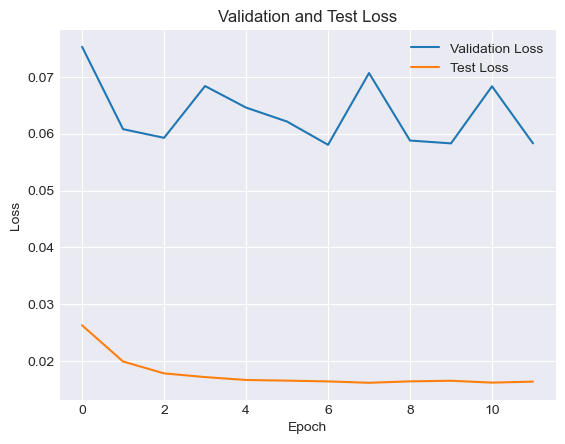

In [87]:
# Plot losses in the dataframe.

# Plot losses
plt.plot(losses['val_loss'], label='Validation Loss')
plt.plot(losses['loss'], label='Test Loss')
plt.title('Validation and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_22744\890740826.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


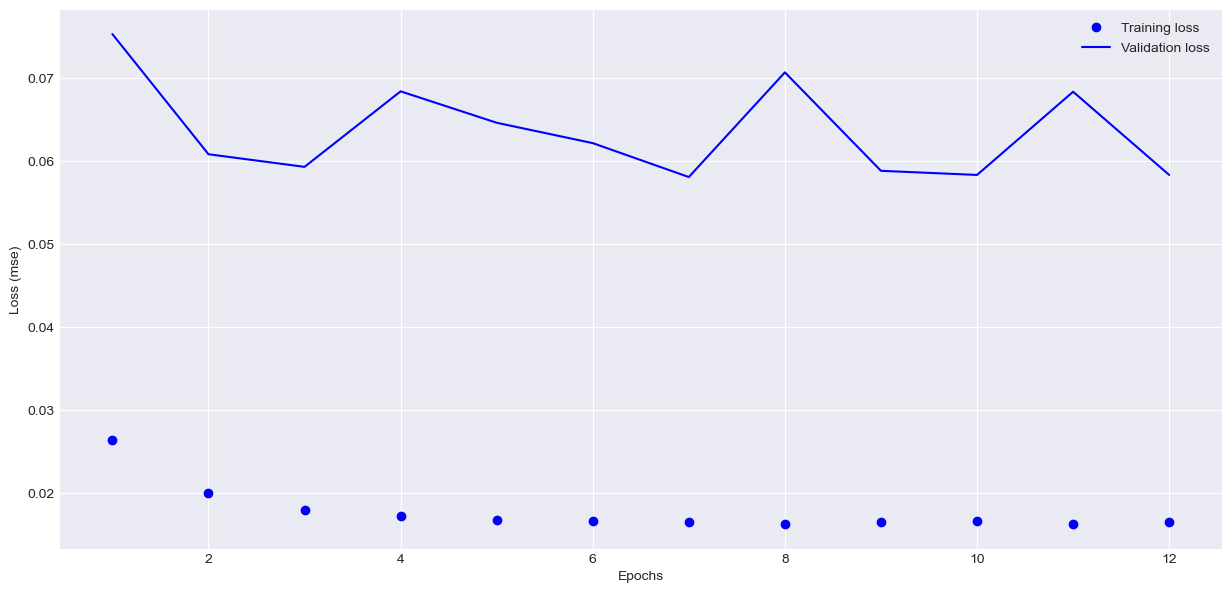

In [88]:
# printing Loss for the neural network training process

history_dict = history.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

## Evaluate on Test Data

In [89]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.5477019 ],
       [0.59486094],
       [0.71362156],
       [1.        ],
       [0.41557863],
       [0.47983074],
       [0.62133571],
       [0.62492692],
       [0.65087275],
       [0.60026169],
       [0.60560675],
       [0.63681412]])

In [90]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch

array([[[0.5477019 ],
        [0.59486094],
        [0.71362156],
        [1.        ],
        [0.41557863],
        [0.47983074],
        [0.62133571],
        [0.62492692],
        [0.65087275],
        [0.60026169],
        [0.60560675],
        [0.63681412]]])

In [91]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 153ms/step


array([[[0.49780434],
        [0.5079586 ],
        [0.5335116 ],
        [0.59409475],
        [0.46754438],
        [0.48319566],
        [0.51365685],
        [0.51442957],
        [0.5200155 ],
        [0.50912124],
        [0.5102718 ],
        [0.5169867 ]]], dtype=float32)

In [92]:
scaled_test[0]

array([0.56724479])

## Try predicting the series!

In [93]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch

array([[[0.5477019 ],
        [0.59486094],
        [0.71362156],
        [1.        ],
        [0.41557863],
        [0.47983074],
        [0.62133571],
        [0.62492692],
        [0.65087275],
        [0.60026169],
        [0.60560675],
        [0.63681412]]])

In [94]:
for i in range(len(test)):
    
    print(i)
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    print(current_pred)
    
    # store prediction
    test_predictions.append(current_pred) 
    print(test_predictions)
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    print(current_batch)

0
1/1 [==============================] - 0s 21ms/step
[[0.49780434]
 [0.5079586 ]
 [0.5335116 ]
 [0.59409475]
 [0.46754438]
 [0.48319566]
 [0.51365685]
 [0.51442957]
 [0.5200155 ]
 [0.50912124]
 [0.5102718 ]
 [0.5169867 ]]
[array([[0.49780434],
       [0.5079586 ],
       [0.5335116 ],
       [0.59409475],
       [0.46754438],
       [0.48319566],
       [0.51365685],
       [0.51442957],
       [0.5200155 ],
       [0.50912124],
       [0.5102718 ],
       [0.5169867 ]], dtype=float32)]


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [95]:
#for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
#    current_pred = model.predict(current_batch)[0]
    
    # store prediction
#    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
#    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [96]:
test_predictions

[array([[0.49780434],
        [0.5079586 ],
        [0.5335116 ],
        [0.59409475],
        [0.46754438],
        [0.48319566],
        [0.51365685],
        [0.51442957],
        [0.5200155 ],
        [0.50912124],
        [0.5102718 ],
        [0.5169867 ]], dtype=float32)]

## Inverse Transformations and Compare

In [97]:
# Отменить масштабирование

scaler.inverse_transform?

In [46]:
true_predictions = scaler.inverse_transform(test_predictions)

In [98]:
true_predictions

array([[22684.53132087],
       [23070.51063204],
       [25994.51561129],
       [31694.61054713],
       [19411.34540194],
       [19857.24223369],
       [21632.95046562],
       [22187.55097568],
       [23219.13862717],
       [22224.35577035],
       [22232.75728369],
       [23044.62095332],
       [21258.62279451],
       [21232.30062199],
       [23134.68885893],
       [29886.13769782],
       [18764.97484481],
       [18927.76594156]])

In [99]:
# IGNORE WARNINGS

test['Predictions'] = true_predictions

C:\Users\Owner\AppData\Local\Temp\ipykernel_22744\3095654106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


## Check and plot predictions

In [100]:
test

,Sales,Predictions
DATE,,
2022-09-01,23152.0,22684.531321
2022-10-01,24243.0,23070.510632
2022-11-01,28045.0,25994.515611
2022-12-01,39263.0,31694.610547
2023-01-01,19118.0,19411.345402
2023-02-01,20666.0,19857.242234
2023-03-01,24510.0,21632.950466
2023-04-01,24232.0,22187.550976
2023-05-01,26096.0,23219.138627


<Axes: xlabel='DATE'>

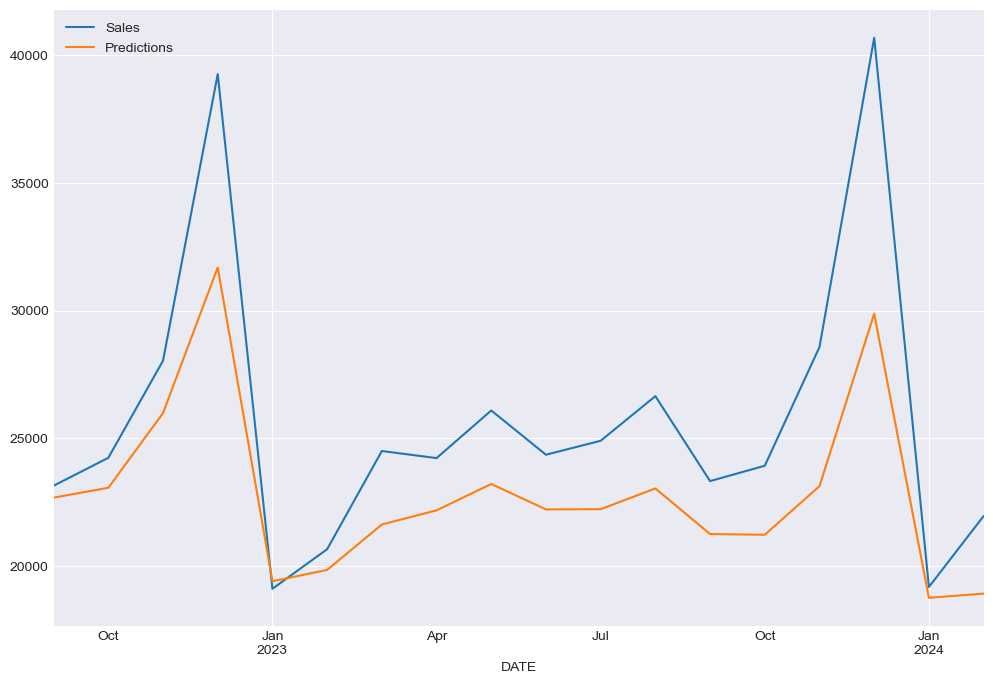

In [101]:
test.plot(figsize=(12,8))

# Retrain and Forecasting

In [102]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [103]:
full_scaler.fit_transform?

In [104]:
print(scaled_full_data.max())
print(scaled_full_data.min())

1.0
0.0


In [105]:
length = 12 # Length of the output sequences (in number of timesteps)

generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [106]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

In [107]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
model.compile(optimizer='adam', loss='mse')

In [109]:
early_stop = EarlyStopping(monitor='loss',patience=5)

In [110]:
# fit model
# IGNORE THE WARNING

history_2 =  model.fit(generator, epochs=30, callbacks=[early_stop])

Epoch 1/30
374/374 [==============================] - 5s 8ms/step - loss: 0.0211
Epoch 2/30
374/374 [==============================] - 3s 8ms/step - loss: 0.0125
Epoch 3/30
374/374 [==============================] - 3s 8ms/step - loss: 0.0088
Epoch 4/30
374/374 [==============================] - 3s 7ms/step - loss: 0.0062
Epoch 5/30
374/374 [==============================] - 3s 8ms/step - loss: 0.0055
Epoch 6/30
374/374 [==============================] - 3s 7ms/step - loss: 0.0045
Epoch 7/30
374/374 [==============================] - 3s 8ms/step - loss: 0.0040
Epoch 8/30
374/374 [==============================] - 3s 7ms/step - loss: 0.0039
Epoch 9/30
374/374 [==============================] - 2s 6ms/step - loss: 0.0033
Epoch 10/30
374/374 [==============================] - 3s 7ms/step - loss: 0.0035
Epoch 11/30
374/374 [==============================] - 3s 8ms/step - loss: 0.0032
Epoch 12/30
374/374 [==============================] - 3s 7ms/step - loss: 0.0031
Epoch 13/30
374/374 [====

C:\Users\Owner\AppData\Local\Temp\ipykernel_22744\3108234073.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


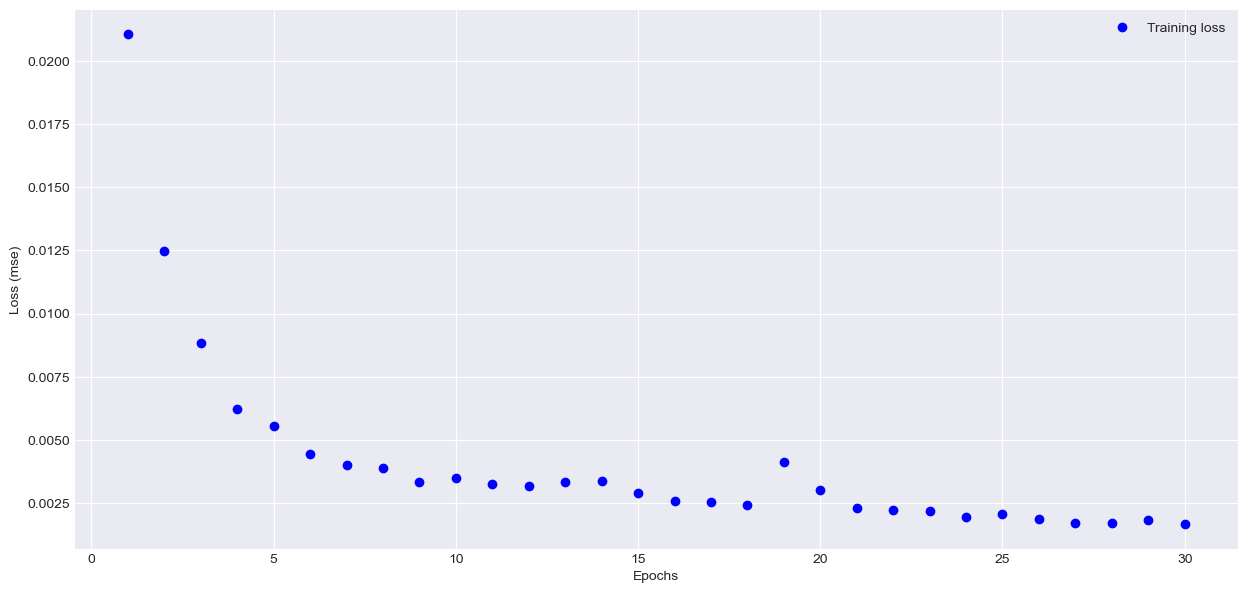

In [111]:
# printing Loss for the neural network training process

history_dict = history_2.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
#val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
#plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

In [61]:
# fit model
#model.fit(generator,epochs=8)

In [112]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 42ms/step


In [113]:
forecast = scaler.inverse_transform(forecast)

In [114]:
forecast

array([[22502.65268809],
       [23264.62969595],
       [24571.48252642],
       [24533.35241657],
       [24737.21757853],
       [25838.76003259],
       [24870.70829046],
       [24974.74017924],
       [28423.9339487 ],
       [35057.03364098],
       [20874.83806825],
       [21614.19265258]])

### Creating new timestamp index with pandas.

In [115]:
df

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2023-10-01,23933.0
2023-11-01,28580.0
2023-12-01,40684.0


### Forecast for next 12 months

In [116]:
forecast_index = pd.date_range(start='2023-02-01', periods=periods, freq='MS')
forecast_index

DatetimeIndex(['2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [117]:
pd.date_range?

In [118]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index,
                           columns=['Forecast'])

In [119]:
forecast_df

,Forecast
2023-02-01,22502.652688
2023-03-01,23264.629696
2023-04-01,24571.482526
2023-05-01,24533.352417
2023-06-01,24737.217579
2023-07-01,25838.760033
2023-08-01,24870.708290
2023-09-01,24974.740179
2023-10-01,28423.933949
2023-11-01,35057.033641


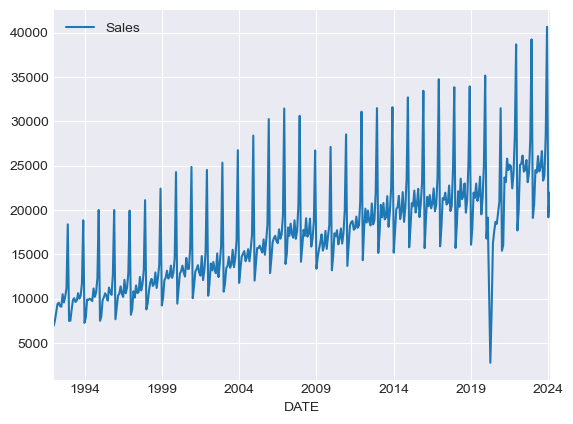

In [120]:
# Plot sales - Values in dataframe

df.plot();

<Axes: >

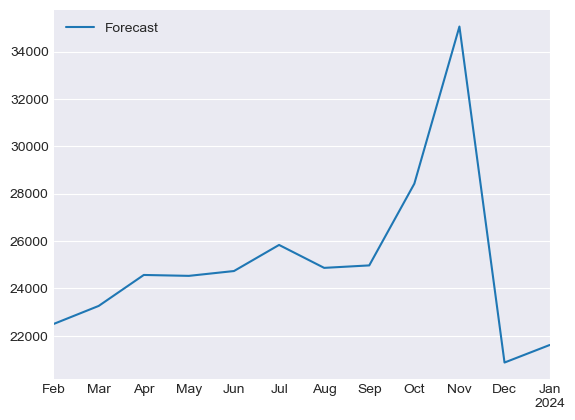

In [121]:
# Plot forecast - Values in forecast_df

forecast_df.plot()

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

<Axes: xlabel='DATE'>

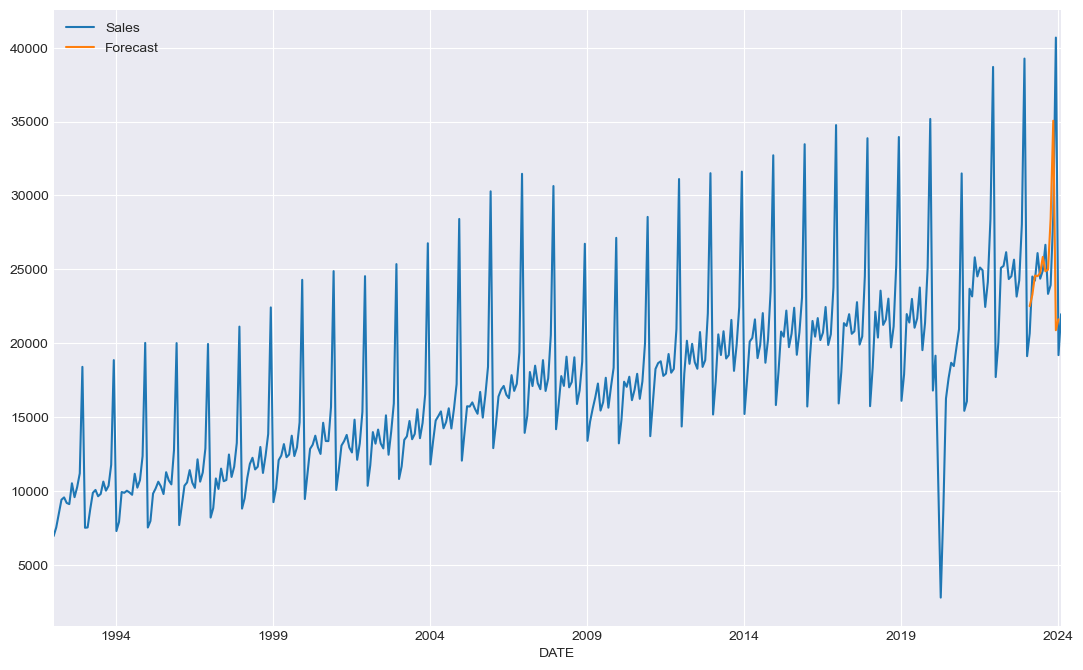

In [122]:
ax = df.plot(figsize=(13,8))
forecast_df.plot(ax=ax)

(612.0, 648.0)

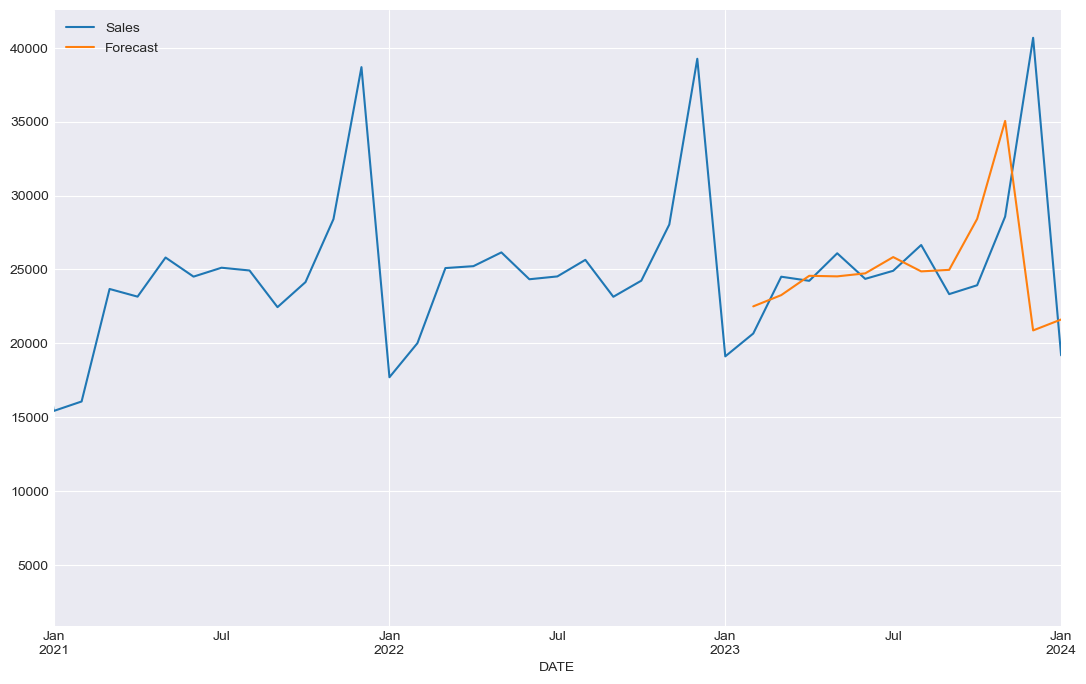

In [123]:
ax = df.plot(figsize=(13,8))
forecast_df.plot(ax=ax)
plt.xlim('2021-01-01','2024-01-01')

### Cecking Forecast for last 12 months

In [124]:
forecast_index = pd.date_range(start='2022-02-01', periods=periods, freq='MS')
forecast_index

DatetimeIndex(['2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01', '2022-08-01', '2022-09-01',
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [125]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index,
                           columns=['Forecast'])

(576.0, 636.0)

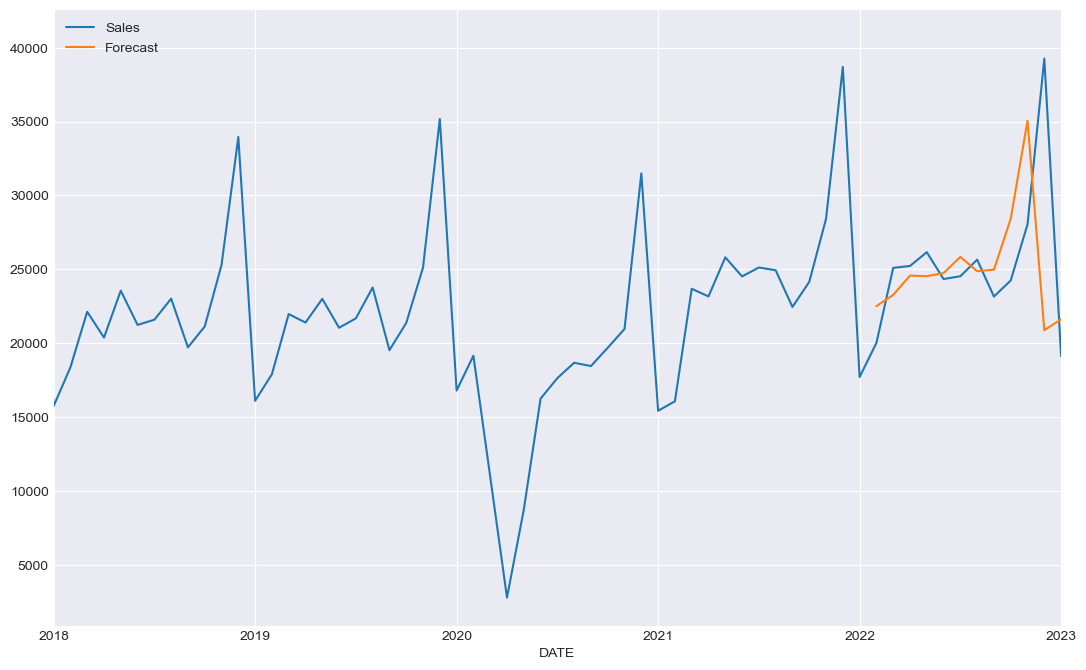

In [126]:
ax = df.plot(figsize=(13,8))
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2023-01-01')